In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df_iris = pd.read_csv('iris.csv')
X = df_iris.drop('species', axis=1)
y = df_iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [3]:
def modify_labels(df, positive_class):
    df_copy = df.copy()
    df_copy['species'] = df_copy['species'].apply(lambda x: positive_class if x == positive_class else 'No-' + positive_class)
    return df_copy


train_df = pd.DataFrame(X_train)
train_df['species'] = y_train
clases = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
train_dfs = [modify_labels(train_df, cls) for cls in clases]

In [4]:
def norma(vector):
    return np.linalg.norm(vector)


def SVM(train_dfs, test_df):
    vec_proms = []
    norma_proms = []
    norm_lists = []
    counts_list = []

    for train_df in train_dfs:
        counts = train_df['species'].value_counts()
        promedios = [train_df[train_df['species'] == clase].drop('species', axis=1).mean().values for clase in train_df['species'].unique()]
        vec_prom = np.mean(promedios, axis=0)
        normas = [norma(prom) for prom in promedios]
        norma_prom = norma(vec_prom)

        vec_proms.append(vec_prom)
        norma_proms.append(norma_prom)
        norm_lists.append(normas)
        counts_list.append(counts)

    features = test_df.drop('species', axis=1).values
    proyecciones = [np.dot(features, vec_prom) / norma_prom for vec_prom, norma_prom in zip(vec_proms, norma_proms)]

    preds = []
    for i, (norm_list, proy, cls) in enumerate(zip(norm_lists, proyecciones, clases)):
        if (cls in ['Iris-setosa', 'Iris-versicolor'] and norm_list[1] > norm_list[0]) or (cls == 'Iris-virginica' and norm_list[0] > norm_list[1]):
            preds.append(np.where(proy >= norma_proms[i], 1, 0))
        else:
            preds.append(np.where(proy >= norma_proms[i], 0, 1))

    tam_df = len(train_df)
    prob_set = preds[0] * (counts_list[0]['Iris-setosa'] / tam_df)
    prob_versi = preds[1] * (counts_list[1]['Iris-versicolor'] / tam_df)
    prob_virgi = preds[2] * (counts_list[2]['Iris-virginica'] / tam_df)
    y_pred = []

    for idx, (P1i, P2i, P3i) in enumerate(zip(prob_set, prob_versi, prob_virgi)):
        if P1i == P2i == P3i:
            y_pred.append('Indefinida')
        else:
            max_prob = max(P1i, P2i, P3i)
            y_pred.append('Iris-setosa' if max_prob == P1i else 'Iris-versicolor' if max_prob == P2i else 'Iris-virginica')

        print(f'Instancia {idx+1}:')
        print(f'  Probabilidad de Setosa: {P1i}')
        print(f'  Probabilidad de Versicolor: {P2i}')
        print(f'  Probabilidad de Virginica: {P3i}')
        print(f'  Clasificación final: {y_pred[idx]}')
        print('-----------------------------------')

    return y_pred

Instancia 1:
  Probabilidad de Setosa: 0.0
  Probabilidad de Versicolor: 0.30833333333333335
  Probabilidad de Virginica: 0.36666666666666664
  Clasificación final: Iris-virginica
-----------------------------------
Instancia 2:
  Probabilidad de Setosa: 0.0
  Probabilidad de Versicolor: 0.0
  Probabilidad de Virginica: 0.0
  Clasificación final: Indefinida
-----------------------------------
Instancia 3:
  Probabilidad de Setosa: 0.325
  Probabilidad de Versicolor: 0.0
  Probabilidad de Virginica: 0.0
  Clasificación final: Iris-setosa
-----------------------------------
Instancia 4:
  Probabilidad de Setosa: 0.0
  Probabilidad de Versicolor: 0.30833333333333335
  Probabilidad de Virginica: 0.36666666666666664
  Clasificación final: Iris-virginica
-----------------------------------
Instancia 5:
  Probabilidad de Setosa: 0.325
  Probabilidad de Versicolor: 0.0
  Probabilidad de Virginica: 0.0
  Clasificación final: Iris-setosa
-----------------------------------
Instancia 6:
  Probabi

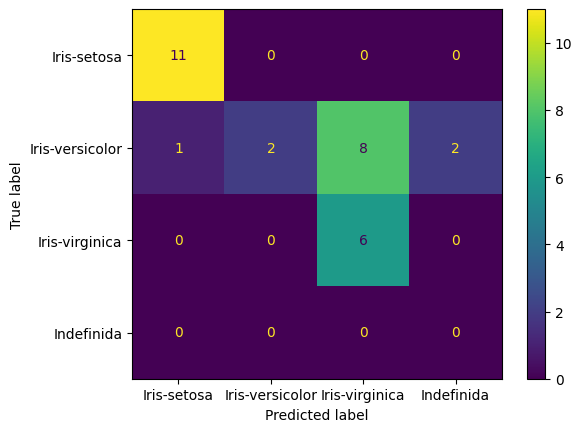

In [5]:
test_df = pd.DataFrame(X_test)
test_df['species'] = y_test
y_pred = SVM(train_dfs, test_df)
reporte = classification_report(y_test, y_pred, zero_division=0)
print(f'{reporte}')
cm = confusion_matrix(y_test, y_pred, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Indefinida'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Indefinida'])
disp.plot()
plt.show()